<a href="https://colab.research.google.com/github/Kashishsarkar/project_1/blob/main/AD_LAB2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score

In [32]:
from google.colab import files
uploaded = files.upload()
df = pd.read_excel('house_data.xlsx')
df.head(5)

Saving house_data.xlsx to house_data (1).xlsx


,House_Size,House_Price
0,374.540119,116714.389066
1,950.714306,270263.924400
2,731.993942,224186.221370
3,598.658484,80219.099529
4,156.018640,35821.997741


In [33]:
total_null = df.isnull()
print(total_null)

    House_Size  House_Price
0        False        False
1        False        False
2        False        False
3        False        False
4        False        False
..         ...          ...
95       False        False
96       False        False
97       False        False
98       False        False
99       False        False

[100 rows x 2 columns]


In [34]:
total_null = df.isnull().sum()
print(total_null)

House_Size     0
House_Price    0
dtype: int64


In [35]:
print("The statistics of the dataset are:")
print(df.describe())

The statistics of the dataset are:
       House_Size    House_Price
count  100.000000     100.000000
mean   470.180743  141000.205005
std    297.489411   93956.895853
min      5.522117  -38096.894236
25%    193.200761   65139.721461
50%    464.142455  133802.788924
75%    730.203119  214881.918906
max    986.886937  352219.753320


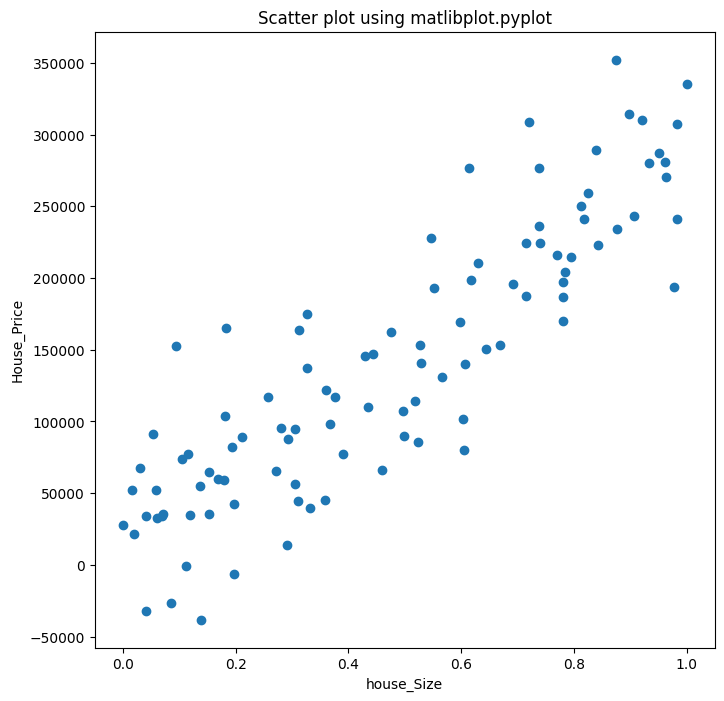

In [50]:
if{'House_Size', 'House_Price'}.issubset(df.columns):
  plt.figure(figsize=(8,8))
  plt.scatter(x= df['House_Size'], y=df['House_Price'])
  plt.xlabel('house_Size')
  plt.ylabel('House_Price')
  plt.title('Scatter plot using matlibplot.pyplot')
  plt.show()


In [37]:
import plotly.express as px
fig = px.histogram(df, x='House_Price')
fig.show()

In [38]:
fig = px.box(df,x='House_Price')
fig.show()

In [39]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df['House_Size'] = scaler.fit_transform(df[['House_Size']])
#fit the dta into a model and transform it into a form that is more suitable for the model in a single step
#also we can use fit() or transform() but fit_transform() is more quick
print(df['House_Size'])

0     0.376025
1     0.963140
2     0.740267
3     0.604399
4     0.153354
        ...   
95    0.497545
96    0.527032
97    0.430033
98    0.020275
99    0.104313
Name: House_Size, Length: 100, dtype: float64


In [40]:
from sklearn.model_selection import train_test_split
x = df['House_Size']
y = df['House_Price']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)
#random number generator --> random_state
#test_size = size of the test dataset
print("Dataset split into training and testing sets:")
print("Training set size:", len(y_train))
print("Testing set size:", len(y_test))

Dataset split into training and testing sets:
Training set size: 80
Testing set size: 20


In [42]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
x_train = x_train.values.reshape(-1,1)
model.fit(x_train,y_train)
print(f"Intercept: {model.intercept_}")   #intercept is b1
print(f"Coeffiecients: {model.coef_[0]}") #coef is the firct element as the eq is y=b1 +b2x

#predicting the y value based on the x as house price is determined by the house size
y_pred = model.predict(x_test.values.reshape(-1,1))
#mean_squared_error & r2_score method is imported from sklearn.metrics
#mse is the mean of the square of errors
mse = mean_squared_error(y_test,y_pred)
#r2_score is also known as the coefficient of determination, statistical measure that indicates why well a reg line fits a set of data
r2= r2_score(y_test,y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Intercept: 8691.485283276212
Coeffiecients: 274715.77557805803
Mean Squared Error: 1634248784.29
R-squared: 0.81


Based on your r2_score we can calculate that the model may be overfitted as its close to 0.81


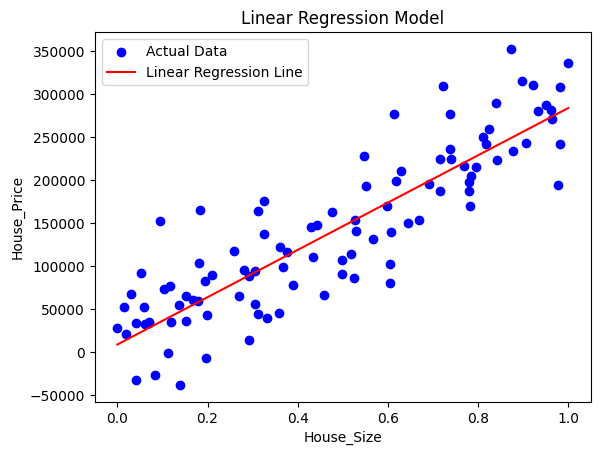

In [48]:
plt.scatter(x,y,color='blue',label='Actual Data')
#np.linspace() gen 1D array with 100 values
#.reshape(-1,1) converts it to a 2D ARRAY WITH 100 rows and 1 col (100,1)
x_line = np.linspace(x.min(),x.max(),100).reshape(-1,1)
y_line = model.predict(x_line)

plt.plot(x_line,y_line,color='red',label='Linear Regression Line')
plt.xlabel('House_Size')
plt.ylabel('House_Price')
plt.title('Linear Regression Model')
plt.legend() #used to place a legend on the axis default loc value is upper left
plt.show()
